In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
user_data = pd.read_csv('user_data.csv')

In [5]:
logs = pd.read_csv('logs.csv')

In [ ]:
# Проверим размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [6]:
user_data.shape

(2954, 3)

In [7]:
logs.shape

(4500, 4)

In [16]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [17]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [23]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [24]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [34]:
logs.platform.nunique()

3

In [35]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [90]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [5]:
user_data_logs = pd.merge(user_data, logs, on='client')
user_data_logs

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [87]:
# Какой клиент совершил больше всего успешных операций в порядке возрастания?
max_success = logs \
.query('success == True') \
.groupby('client') \
.agg({'success':'count'}) \
.sort_values('success', ascending=False) \
.reset_index() \
.query('success == 41') \
.sort_values('client') \
.client

max_success_users_id = [x for x in max_success]
max_success_users_id

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [89]:
# С какой платформы осуществляется наибольшее количество успешных операций?
max_success_platform = logs \
.query('success == True') \
.groupby('platform') \
.agg({'success':'count'}) \
.idxmax()

max_success_platform

success    phone
dtype: object

In [101]:
#Какая платформа наиболее популярна среди премиумных клиентов?
popular_premium_platform = user_data_logs \
.query('premium == True') \
.groupby('platform') \
.agg({'platform':'count'}) \
.idxmax()

popular_premium_platform

platform    phone
dtype: object

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


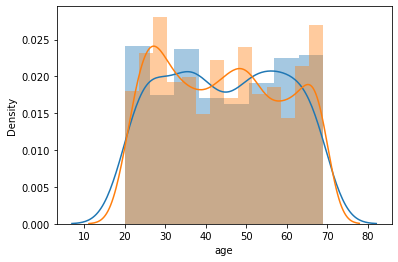

In [125]:
# Визуализируем распределение возраста клиентов в зависимости от типа клиента (обычный или премиум)
sns.distplot(user_data_logs.query('premium == True').age)
sns.distplot(user_data_logs.query('premium == False').age)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


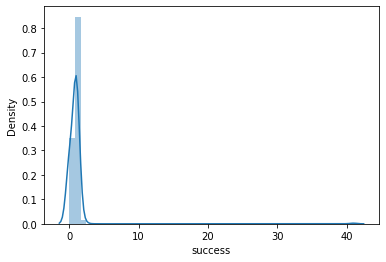

In [244]:
# Построем график распределения числа успешных операций
sns.distplot(user_data_logs.groupby('client')['success'].sum())

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


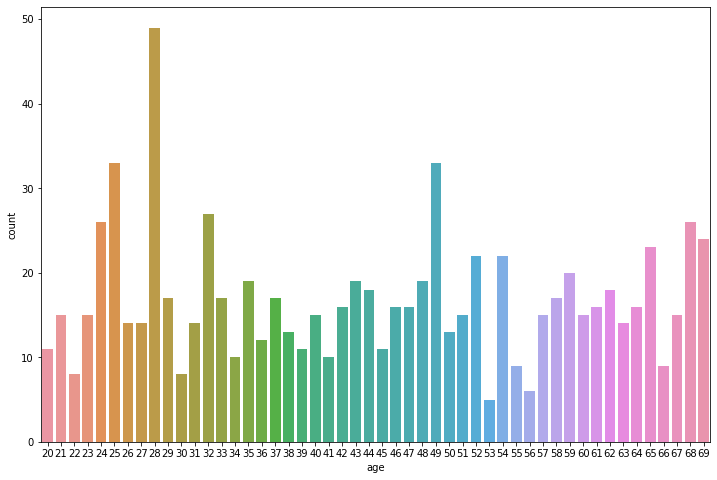

In [21]:
# Визуализируем число успешных операций, сделанных на платформе computer, в зависимости от возраста
plt.figure(figsize=(12, 8))
sns.countplot(user_data_logs.query('success == True and platform == "computer"').age)